In [3]:
# 初回のみライブラリをインポートする
import pandas as pd

# csvファイルをデータフレームとして読み込む
df = pd.read_csv("sample_pandas_6.csv")
# 先頭から5行目までを表示する
df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [4]:
df.query('商品番号 == "Z4WOOIYV"')

,発注日,商品番号,商品名,単価,在庫,注文数
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
5,2024-04-12,Z4WOOIYV,商品サンプル Z4WOOIYV,90,35,24
24,2020-05-08,Z4WOOIYV,商品サンプル Z4WOOIYV,90,10,36
25,2022-03-21,Z4WOOIYV,商品サンプル Z4WOOIYV,90,15,54
32,2023-12-16,Z4WOOIYV,商品サンプル Z4WOOIYV,90,0,6
36,2024-08-29,Z4WOOIYV,商品サンプル Z4WOOIYV,90,35,0
54,2023-11-07,Z4WOOIYV,商品サンプル Z4WOOIYV,90,25,48
59,2020-05-03,Z4WOOIYV,商品サンプル Z4WOOIYV,90,20,42
67,2022-10-24,Z4WOOIYV,商品サンプル Z4WOOIYV,90,5,24
71,2017-10-09,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,54


In [7]:
def tax(x):
    return x * 1.10

df['単価'].apply(tax)

,単価
0,858.0
1,99.0
2,858.0
3,660.0
4,660.0
...,...
195,660.0
196,99.0
197,363.0
198,462.0


In [8]:
tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込み）"
pd.concat([df, tax_series], axis=1)

,発注日,商品番号,商品名,単価,在庫,注文数,単価（税込み）
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,858.0
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,99.0
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,858.0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,660.0
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,660.0
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,660.0
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,99.0
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,363.0
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,462.0


In [9]:
category_df = pd.read_csv('category.csv')
category_df

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [11]:
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー_x,カテゴリー_y
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当,弁当
...,...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨,雑貨


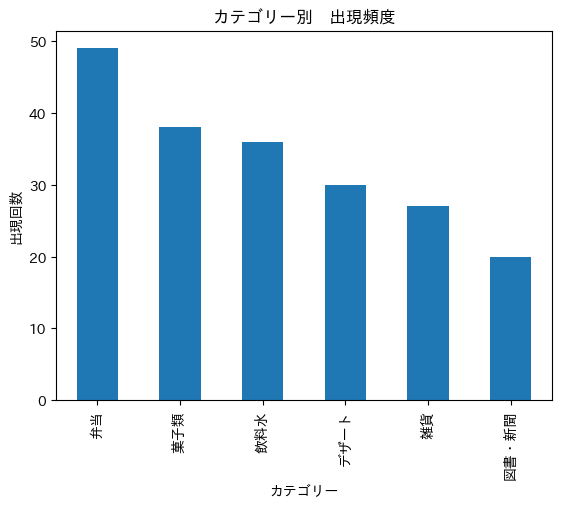

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

#カテゴリー列のユニークな出現頻度をカウントする
category_counts = df['カテゴリー_y'].value_counts()

#出現頻度を棒グラフで可視化
category_counts.plot(kind='bar')

#グラフのタイトル・ラベルを設定
plt.title('カテゴリー別　出現頻度')
plt.xlabel('カテゴリー')
plt.ylabel('出現回数')

#グラフを表示
plt.show()



In [14]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 75.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f15cebb896306a26964f27ef3c5b7bf1952e2c91f88c3d21817a58c095018a30
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [17]:
#商品番号ごとに「注文数」を集計（平均・合計など）
summary = df.groupby('商品番号')['注文数'].agg(['sum', 'mean', 'max', 'min'])

#さらに基本統計量も取得
stats = df.groupby('商品番号')['注文数'].describe()

#結果を表示
print("▼集計結果")
print(summary)

print("\n▼基本統計量")
print(stats)


▼集計結果
           sum       mean  max  min
商品番号                               
1QJFO8QY  1128  35.250000   60    0
2HSTCDWM   588  29.400000   60    0
48XMJXKO   216  21.600000   42    0
8T7D5DQA   528  25.142857   54    0
MESUDVWQ   744  43.764706   60    0
QRMOGNUU   894  33.111111   60    6
S6RE8W6X   666  33.300000   60    0
X0ZE2ZMY   306  21.857143   60    0
YY4HAAZR   540  31.764706   60    0
Z4WOOIYV   588  26.727273   60    0

▼基本統計量
          count       mean        std  min   25%   50%   75%   max
商品番号                                                              
1QJFO8QY   32.0  35.250000  18.461818  0.0  24.0  36.0  49.5  60.0
2HSTCDWM   20.0  29.400000  21.137146  0.0  12.0  27.0  48.0  60.0
48XMJXKO   10.0  21.600000  13.326665  0.0  13.5  21.0  30.0  42.0
8T7D5DQA   21.0  25.142857  18.260027  0.0  12.0  36.0  42.0  54.0
MESUDVWQ   17.0  43.764706  18.219253  0.0  42.0  48.0  54.0  60.0
QRMOGNUU   27.0  33.111111  16.588535  6.0  21.0  36.0  48.0  60.0
S6RE8W6X   20.0  3